# Test latitude masking for percipitation 

- author: Johannes L. Fjeldså
- email: johannes.larsen.fjeldså@nmbu.no

## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

from src.preproces import *

## Plotting 

In [4]:
def plot_on_map(data,
                center_lon=0, center_lat=20,
                cmap='viridis',
                title=None, 
                v_min=None,
                v_max=None):
    """
    Parameters:
    - data (xr.DataArray): The data to be plotted. Horizontal 2D data at a single time step.
    - center_lat (float): The latitude for the center of the plot.
    - center_lon (float): The longitude for the center of the plot.
    - cmap (str or Colormap): The colormap to be used for the plot.
    - title (str): The title of the plot.
    - v_min (float): The minimum value for the colorbar.
    - v_max (float): The maximum value for the colorbar.
    """
    
    p = data.plot(
        subplot_kws=dict(projection=ccrs.Robinson(central_longitude=center_lon), facecolor="gray"),
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        vmin=v_min,
        vmax=v_max, 
        cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
        robust=True
    )
    p.axes.set_global()
    p.axes.coastlines()

    if title is None:
        title = "Map plot"
    plt.title(title)

    plt.show()


## Import test file

In [3]:
file_handler = Handle_Files()
path_raw_data = '/nird/projects/NS9188K/bjornhs/ACCESS-ESM1-5/'

file_names = file_handler.get_all_netcdf_files_in_dir(path_raw_data)
test_file = file_handler.read_netcdf_to_xr(''.join([path_raw_data, file_names[2]]))
test_file

<xarray.Dataset>
Dimensions:    (time: 31411, bnds: 2, lon: 192, lat: 145)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/50)
    CDI:                    Climate Data Interface version 1.9.9 (https://mpi...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    institution:            Commonwealth Scientific and Industrial Research O...
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    ...                     ...
    variant_label:          r27i1p1f1
    version:                v20210831
    license:                CMIP6 model data produced by CSIRO is licensed un...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/cce6ed44-3b97-46f1-8aec-2621b4d67179
    CDO:                    Climate Data Operators version 1.9.9 (https://mpi...

## Create file-compatible masking

The global masking of percipitation with intermask meanscaling is shown bellow. 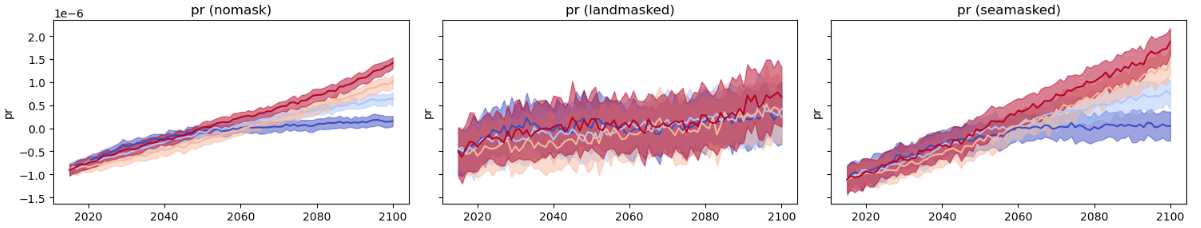

For early emerging signal this is quite unusable since the ensambles are at large overlapping as well as the means being close. Examining the [ipcc interactive atlas](https://interactive-atlas.ipcc.ch/regional-information#eyJ0eXBlIjoiQVRMQVMiLCJjb21tb25zIjp7ImxhdCI6LTMwNzYzOTAsImxuZyI6MjMxNzIzLCJ6b29tIjozLCJwcm9qIjoiRVBTRzo1NDAzMCIsIm1vZGUiOiJjb21wbGV0ZV9hdGxhcyJ9LCJwcmltYXJ5Ijp7InNjZW5hcmlvIjoic3NwMTI2IiwicGVyaW9kIjoibmVhciIsInNlYXNvbiI6InllYXIiLCJkYXRhc2V0IjoiQ01JUDYiLCJ2YXJpYWJsZSI6InByIiwidmFsdWVUeXBlIjoiUkVMQVRJVkVfQU5PTUFMWSIsImhhdGNoaW5nIjoiU0lNUExFIiwicmVnaW9uU2V0IjoiYXI2IiwiYmFzZWxpbmUiOiJwcmVJbmR1c3RyaWFsIiwicmVnaW9uc1NlbGVjdGVkIjpbXX0sInBsb3QiOnsiYWN0aXZlVGFiIjoicGx1bWUiLCJtYXNrIjoibm9uZSIsInNjYXR0ZXJZTWFnIjpudWxsLCJzY2F0dGVyWVZhciI6bnVsbCwic2hvd2luZyI6ZmFsc2V9fQ==) we have some key features that can be extracted from the total percipititaion (*pr*) variable agregated from CMIP6 model ensambles:


![CMIP6 - Total precipitation (PR) Change % - Near Term (2021-2040) SSP1-2.6 (rel. to 1850-1900) - Annual (31 models).png](<attachment:CMIP6 - Total precipitation (PR) Change % - Near Term (2021-2040) SSP1-2.6 (rel. to 1850-1900) - Annual (31 models).png>)